<a href="https://colab.research.google.com/github/hkhong72/big_data/blob/main/221013%EB%AA%A8%EB%B2%94%EB%8B%B5%EC%95%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
path = '/content/data.csv'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1. 전체 인원 수, 생존자 수, 사망자 수는 몇 명인가?


In [ ]:
df = pd.read_csv(path)
s_data = df['Survived']
svc = s_data.value_counts()
svc

0    549
1    342
Name: Survived, dtype: int64

2. 생존자와 사망자를 Pie그래프로 나타내고 생존자와 사망자의 퍼센트를 소수점 2자리까지 나타내시오. (파이 이미지를 제출하시오.)


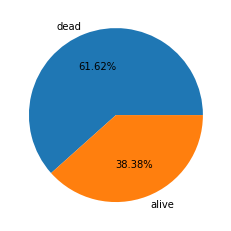

In [ ]:
plt.pie(svc.values,labels=["dead","alive"],autopct="%.2f%%")
plt.show()

3. 결측 데이터가 있는 컬럼을 조사하시오.(컬럼 별로 결측 데이터 개수)


In [ ]:
df.info()
print(df['Age'].isnull().sum())
print(df['Cabin'].isnull().sum())
print(df['Embarked'].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
177
687
2


4. Pclass의 종류 별로 승객 분포를 파이 그래프로 나타내시오.


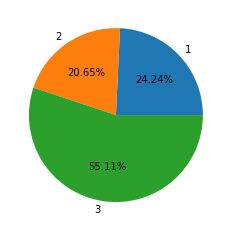

In [ ]:
p_data = df['Pclass']
pvc = p_data.value_counts().sort_index()
plt.pie(pvc.values,labels=pvc.index,autopct="%.2f%%")
plt.show()

5. Pclass의 종류 별로 생존자 수와 사망자 수를 막대그래프로 나타내시오.(종류 별로 하나의 막대에 생존자 수와 사망자 수를 표시하시오.)


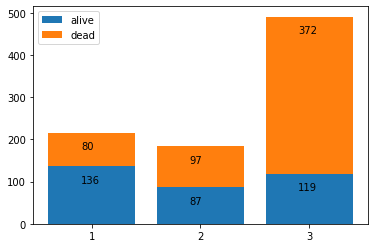

In [ ]:
labels=['1','2','3']
pc_alive_arr = np.zeros(len(pvc))
pc_dead_arr = np.zeros(len(pvc))

for index in range(len(p_data)):
  pi = p_data[index]-1 #인덱스 = 클래스 값 -1
  if s_data[index] == 0:#죽었을 때
    pc_dead_arr[pi]+=1
  else:#살았을 때
    pc_alive_arr[pi]+=1
plt.bar(labels,pc_alive_arr,label="alive")
plt.bar(labels,pc_dead_arr,bottom=pc_alive_arr,label="dead")
for i in range(len(pvc)):
  plt.annotate(str(int(pc_alive_arr[i])),(i-0.1,pc_alive_arr[i]-40))
  plt.annotate(str(int(pc_dead_arr[i])),(i-0.1,pc_alive_arr[i]+pc_dead_arr[i]-40))
plt.legend()
plt.show()

6. Name 컬럼에 호칭을 Mr, Mrs, Miss, Master, Dr, ETC(나머지)로 나누어 분포를 파이 그래프로 나타내시오.


In [ ]:
cns = ['Mr','Mrs','Miss','Master','Dr','ETC']
def get_call_ni(n):  
  sub_s = n.split(',')
  ssub_s = sub_s[1].split('.')
  cn = ssub_s[0].replace(' ','')
  for i in range(len(cns)-1):
    if cn == cns[i]:
      return i
  return 5

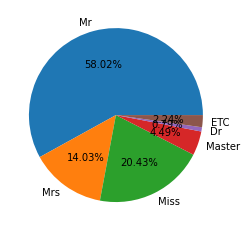

In [ ]:
n_data = df['Name']
pn_arr = np.zeros(6)
pn_alive_arr = np.zeros(6)
pn_dead_arr = np.zeros(6)
for index in range(len(n_data)):
  ni = get_call_ni(n_data[index]) #인덱스 = 클래스 값 -1
  if s_data[index] == 0:#죽었을 때
    pn_dead_arr[ni]+=1
  else:#살았을 때
    pn_alive_arr[ni]+=1
  pn_arr[ni]+=1
plt.pie(pn_arr,labels=cns,autopct="%.2f%%")
plt.show()

7. 호칭에 따른 생존자 수와 사망자 수를 막대그래프로 나타내시오.(아래:생존자, 위:사망자)


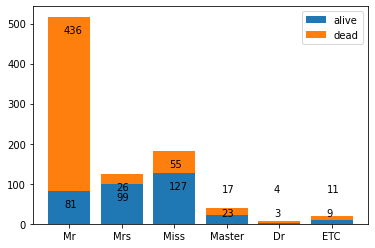

In [ ]:
plt.bar(cns,pn_alive_arr,label="alive")
plt.bar(cns,pn_dead_arr,bottom=pn_alive_arr,label="dead")
for i in range(len(cns)):
  if pn_alive_arr[i]<40:
    plt.annotate(str(int(pn_alive_arr[i])),(i-0.1,20))
  else:
    plt.annotate(str(int(pn_alive_arr[i])),(i-0.1,pn_alive_arr[i]-40))
  if pn_alive_arr[i] + pn_dead_arr[i] < 80:
    plt.annotate(str(int(pn_dead_arr[i])),(i-0.1,80))
  else:
    plt.annotate(str(int(pn_dead_arr[i])),(i-0.1,pn_alive_arr[i]+pn_dead_arr[i]-40))
plt.legend()
plt.show()

8. 성별에 따른 승객 분포를 파이 그래프로 나타내시오.


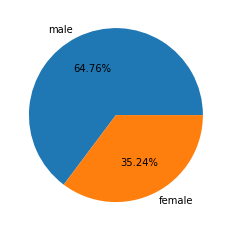

In [ ]:
g_data = df['Sex']
gvc = g_data.value_counts()
plt.pie(gvc.values, labels=gvc.index,autopct="%.2f%%")
plt.show()

9. 성별에 따른 생존자 수와 사망자 수를 막대그래프로 나타내시오.(아래:생존자, 위:사망자)


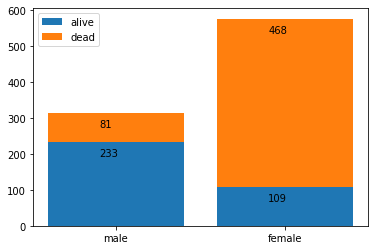

In [ ]:
labels=gvc.index
g_alive_arr = np.zeros(len(gvc))
g_dead_arr = np.zeros(len(gvc))

for index in range(len(g_data)):
  if g_data[index] == 'female':
    gi = 0
  else:
    gi = 1
  if s_data[index] == 0:#죽었을 때
    g_dead_arr[gi]+=1
  else:#살았을 때
    g_alive_arr[gi]+=1
plt.bar(labels,g_alive_arr,label="alive")
plt.bar(labels,g_dead_arr,bottom=g_alive_arr,label="dead")
for i in range(len(gvc)):
  plt.annotate(str(int(g_alive_arr[i])),(i-0.1,g_alive_arr[i]-40))
  plt.annotate(str(int(g_dead_arr[i])),(i-0.1,g_alive_arr[i]+g_dead_arr[i]-40))
plt.legend()
plt.show()

10. 나이를 5살 범위로(0~5, 5~10,...) 나누어 승객 분포를 파이 그래프로 나타내시오.(결측값은 평균 나이로 처리하시오.)


0


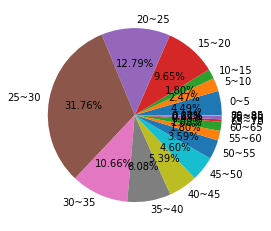

[ 40  22  16  86 114 283  95  72  48  41  32  16  15   4   6   0   1]


In [ ]:
bins = [i for i in range(0,90,5)]
labels = []
cnt = 0
for i in range(0,85,5):
  labels.append(str(i)+"~"+str(i+5))  
print(cnt)

a_data = df['Age']
a_data = a_data.fillna(a_data.mean())
hist, bins = np.histogram(a_data.values,bins=bins)
plt.pie(hist,labels=labels,autopct="%.2f%%")
plt.show()

11. 나이(10번 문제에서 구분한 범위)에 따른 생존자 수와 사망자 수를 막대그래프로 나타내시오.(아래:생존자, 위:사망자)


In [ ]:
print(len(labels))

16


In [ ]:
print(v_labels)

['0', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '80']


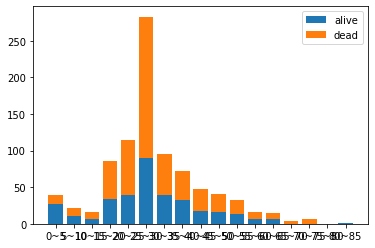

00~05 27.0 , 13.0
05~10 11.0 , 11.0
10~15 7.0 , 9.0
15~20 34.0 , 52.0
20~25 39.0 , 75.0
25~30 90.0 , 193.0
30~35 40.0 , 55.0
35~40 33.0 , 39.0
40~45 18.0 , 30.0
45~50 16.0 , 25.0
50~55 14.0 , 18.0
55~60 6.0 , 10.0
60~65 6.0 , 9.0
65~70 0.0 , 4.0
70~75 0.0 , 6.0
75~80 0.0 , 0.0
80~85 1.0 , 0.0


In [ ]:
a_alive_arr = np.zeros(len(labels))
a_dead_arr = np.zeros(len(labels))

for index in range(len(a_data)):
  ai = int(a_data[index]//5)
  if s_data[index] == 0:#죽었을 때
    a_dead_arr[ai]+=1
  else:#살았을 때
    a_alive_arr[ai]+=1

plt.bar(labels,a_alive_arr,label="alive")
plt.bar(labels,a_dead_arr,bottom=a_alive_arr,label="dead")

plt.legend()
plt.show()
for i in range(len(labels)):
  print(f"{int(i*5):02d}~{int((i+1)*5):02d}",a_alive_arr[i],",",a_dead_arr[i])

12. SibSp 값에 따라 승객 분포를 파이 그래프로 나타내시오.


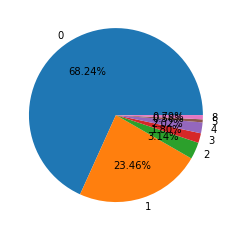

In [ ]:
ss_data = df['SibSp']
svc = ss_data.value_counts().sort_index()
plt.pie(svc.values,labels=svc.index,autopct="%.2f%%")
plt.show()

In [ ]:
print(svc)

0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64


13. SibSp 값에 따른 생존자 수와 사망자 수를 막대그래프로 나타내시오.(아래:생존자, 위:사망자)


In [ ]:
sc_dead_arr, sc_alive_arr

(array([608.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([  0., 209.,  28.,  16.,  18.,   5.,   0.,   0.,   7.]))

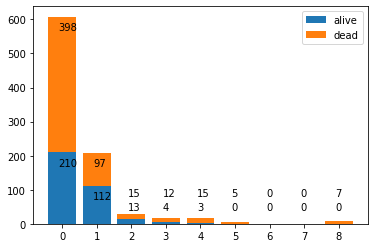

In [ ]:
labels=[str(i) for i in range(9)]
sc_alive_arr = np.zeros(9)
sc_dead_arr = np.zeros(9)

for index in range(len(s_data)):
  si = ss_data[index] 
  if s_data[index] == 0:#죽었을 때
    sc_dead_arr[si]+=1
  else:#살았을 때
    sc_alive_arr[si]+=1
plt.bar(labels,sc_alive_arr,label="alive")
plt.bar(labels,sc_dead_arr,bottom=sc_alive_arr,label="dead")
for i in range(len(labels)):
  if sc_alive_arr[i] <40:
    plt.annotate(str(int(sc_alive_arr[i])),(i-0.1,40))    
    plt.annotate(str(int(sc_dead_arr[i])),(i-0.1,80))
  else:
    plt.annotate(str(int(sc_alive_arr[i])),(i-0.1,sc_alive_arr[i]-40))
    plt.annotate(str(int(sc_dead_arr[i])),(i-0.1,sc_alive_arr[i]+sc_dead_arr[i]-40))
plt.legend()
plt.show()

14. Parch 값에 따라 승객 분포를 파이 그래프로 나타내시오.


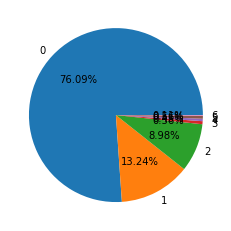

In [ ]:
ps_data = df['Parch']
pvc = ps_data.value_counts().sort_index()
plt.pie(pvc.values,labels=pvc.index,autopct="%.2f%%")
plt.show()

15. Parch 값에 따른 생존자 수와 사망자 수를 막대그래프로 나타내시오.(아래:생존자, 위:사망자)


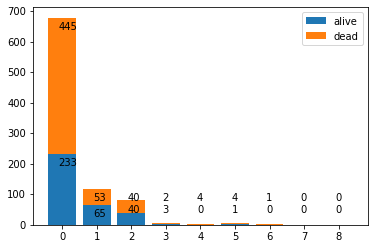

In [ ]:
labels=[str(i) for i in range(9)]
pc_alive_arr = np.zeros(9)
pc_dead_arr = np.zeros(9)

for index in range(len(s_data)):
  si = ps_data[index] 
  if s_data[index] == 0:#죽었을 때
    pc_dead_arr[si]+=1
  else:#살았을 때
    pc_alive_arr[si]+=1
plt.bar(labels,pc_alive_arr,label="alive")
plt.bar(labels,pc_dead_arr,bottom=pc_alive_arr,label="dead")
for i in range(len(labels)):
  if sc_alive_arr[i] <40:
    plt.annotate(str(int(pc_alive_arr[i])),(i-0.1,40))    
    plt.annotate(str(int(pc_dead_arr[i])),(i-0.1,80))
  else:
    plt.annotate(str(int(pc_alive_arr[i])),(i-0.1,pc_alive_arr[i]-40))
    plt.annotate(str(int(pc_dead_arr[i])),(i-0.1,pc_alive_arr[i]+pc_dead_arr[i]-40))
plt.legend()
plt.show()

16. 승선한 항구(Embarked)에 따른 승객 분포를 파이 그래프로 나타내시오.(결측 값은 'N'으로 처리)


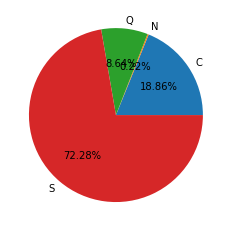

In [ ]:
es_data = df['Embarked']
es_data = es_data.fillna('N')
evc = es_data.value_counts().sort_index()
plt.pie(evc.values,labels=evc.index,autopct="%.2f%%")
plt.show()

In [ ]:
evc

C    168
N      2
Q     77
S    644
Name: Embarked, dtype: int64

17. 승선한 항구(Embarked)에 따른 생존자 수와 사망자 수를 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

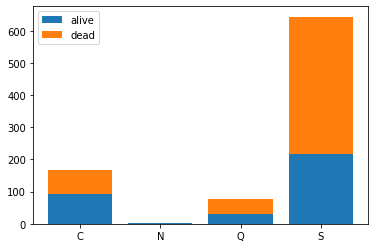

In [ ]:
labels=evc.index
ec_alive_arr = np.zeros(4)
ec_dead_arr = np.zeros(4)

for index in range(len(es_data)):
  rei=-1
  for ei in range(len(labels)):
    if labels[ei] == es_data[index]:
      rei = ei
      break
  si = s_data[index] 
  if s_data[index] == 0:#죽었을 때
    ec_dead_arr[rei]+=1
  else:#살았을 때
    ec_alive_arr[rei]+=1
plt.bar(labels,ec_alive_arr,label="alive")
plt.bar(labels,ec_dead_arr,bottom=ec_alive_arr,label="dead")
plt.legend()
plt.show()

18. Age 컬럼의 값을 표준 스케일로 변환하시오. (표준 스케일로 변환하면 평균은 0, 표준편차는 1로 바뀜, 결측치는 평균 값으로 처리)

In [ ]:
a_data = df['Age']
a_data.describe()

count    7.140000e+02
mean     4.975789e-18
std      1.000000e+00
min     -2.015566e+00
25%     -6.590796e-01
50%     -1.169668e-01
75%      5.714304e-01
max      3.462699e+00
Name: Age, dtype: float64

In [ ]:
a_data = df['Age']
age_mean = a_data.mean()
age_std = a_data.std()
print("변환 전 평균:",age_mean, " 표준 편차:",age_std)

a_data = (a_data - age_mean)/age_std #표준 스케일 변환

age_mean = a_data.mean()
age_std = a_data.std()
print("변환 후 평균:",np.round(age_mean,2), " 표준 편차:",age_std)

변환 전 평균: 29.69911764705882  표준 편차: 14.526497332334042
변환 후 평균: 0.0  표준 편차: 1.0
